# Лабораторная работа по вейвлет-преобразованиям

In [29]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [8]:
import pywt
wavelet = pywt.Wavelet('haar')
print(wavelet)

Wavelet haar
  Family name:    Haar
  Short name:     haar
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [10]:
wavelet.filter_bank

([0.7071067811865476, 0.7071067811865476],
 [-0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, -0.7071067811865476])

In [370]:
wavelet = pywt.Wavelet('db1')
print(wavelet)

Wavelet db1
  Family name:    Daubechies
  Short name:     db
  Filters length: 2
  Orthogonal:     True
  Biorthogonal:   True
  Symmetry:       asymmetric
  DWT:            True
  CWT:            False


In [371]:
wavelet.filter_bank

([0.7071067811865476, 0.7071067811865476],
 [-0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, 0.7071067811865476],
 [0.7071067811865476, -0.7071067811865476])

# Рабочие функции

In [336]:
def image_normalization(src_img):
    norm_img = (src_img - np.min(src_img)) / (np.max(src_img) - np.min(src_img))
    return norm_img

def merge_images(cA, cH_V_D): 
    cH, cV, cD = cH_V_D
    cH = image_normalization(cH) 
    cV = image_normalization(cV) 
    cD = image_normalization(cD) 
    cA = cA[0:cH.shape[0], 0:cV.shape[1]] 
    return np.vstack((np.hstack((cA,cH)), np.hstack((cV, cD))))

def coeffs_visualization(cof):
    norm_cof0 = cof[0]
    norm_cof0 = image_normalization(norm_cof0) 
    merge = norm_cof0
    
    for i in range(1, len(cof)):
        merge = merge_images(merge, cof[i])  
      
    fig, axs = plt.subplots(2, 1, figsize=(8, 16))
    print("2 - Нулевой коэффициент")
    axs[0].imshow(cof[0])
    print("3 - Все коэффициенты")
    axs[1].imshow(merge)
    
def wavelet_transform_for_image(src_image, level, M_WAVELET="haar", mode="sym"):
    data = src_image.astype(np.float64)
    coeffs = pywt.wavedec2(data, M_WAVELET, level=level, mode=mode)
    return coeffs

In [337]:
def processing(im , WAVELET):

        LEVEL = 4

        im = cv2.resize(im,(512,512))

        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        print ("1 - Нормированный оригинал")
        plt.imshow(im)

        coeffs= wavelet_transform_for_image(im , LEVEL, M_WAVELET=WAVELET)
        coeffs_visualization(coeffs)
        return coeffs

# Исходная картинка 

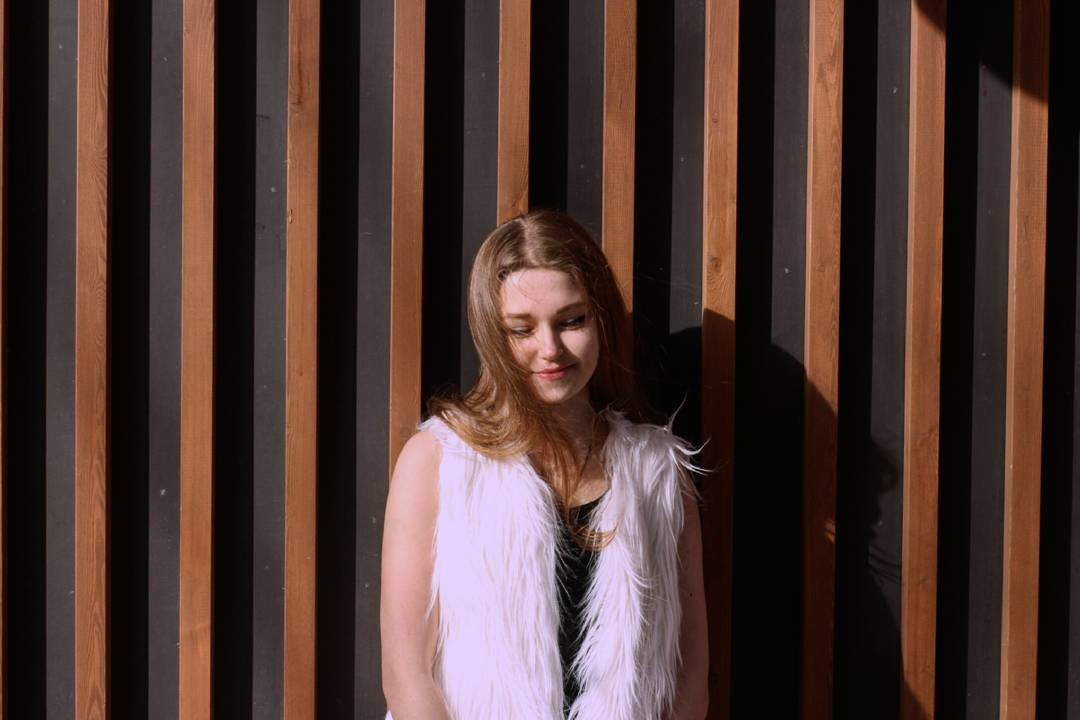

In [298]:
from IPython.display import Image 
pil_img = Image(filename='masha.jpg')
display(pil_img)

# Преобразовываем :

1 - Нормированный оригинал
2 - Нулевой коэффициент
3 - Все коэффициенты


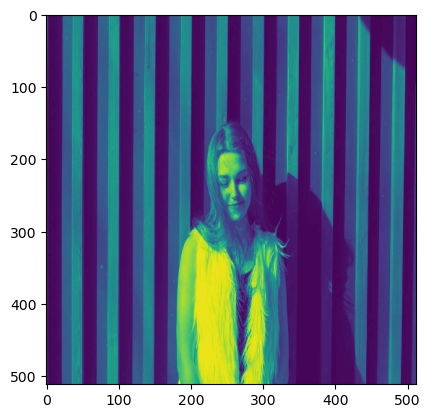

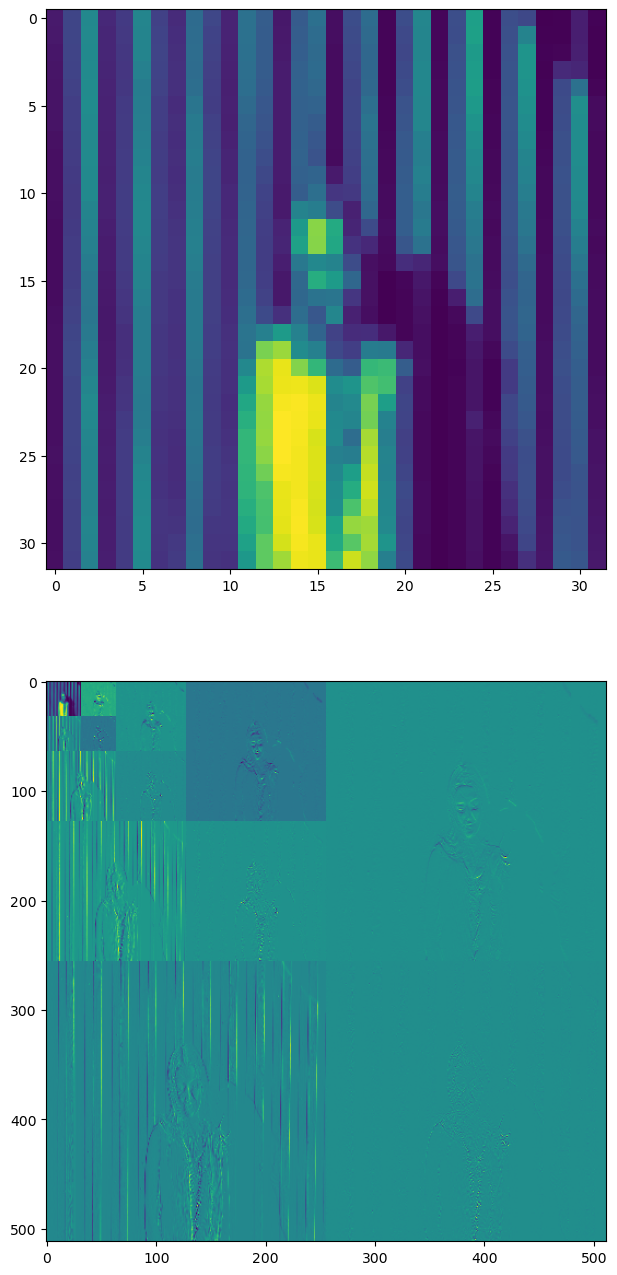

In [583]:
filename = 'masha.jpg'

im = cv2.imread(filename)

coeffs = processing (im , 'db1')

# Контуры остались в высокочастотных составляющих (горизонтальное и вертикальное ) :

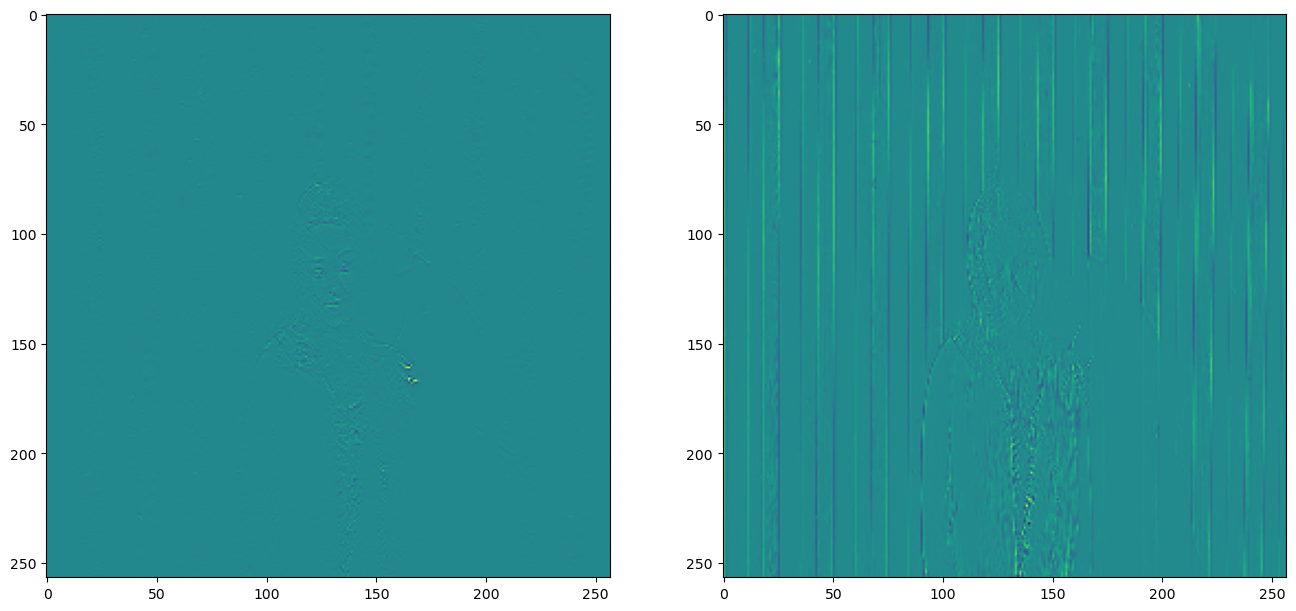

In [319]:
fig, axs = plt.subplots(1, 2, figsize=(16, 8))
axs[0].imshow(coeffs[4][0])
axs[1].imshow(coeffs[4][1])

# Теперь восстановим без высоких частот

In [339]:
G = pywt.waverec2(coeffs[:4], 'db1')

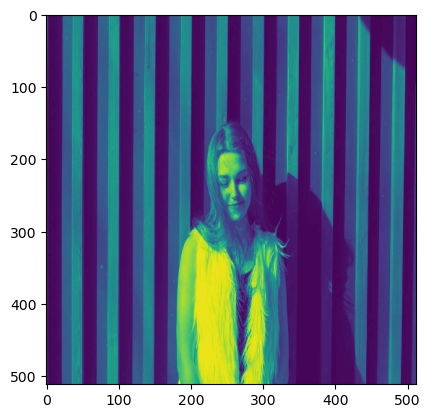

In [346]:
plt.imshow(G)

# Результат отличный , теперь Хаар

1 - Нормированный оригинал
2 - Нулевой коэффициент
3 - Все коэффициенты


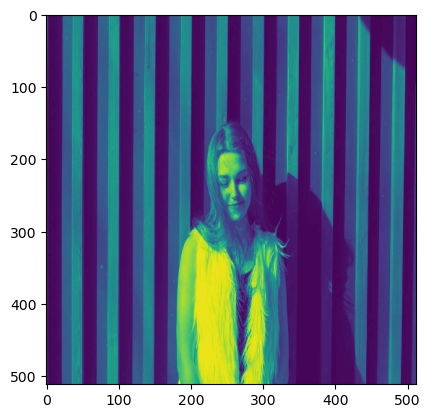

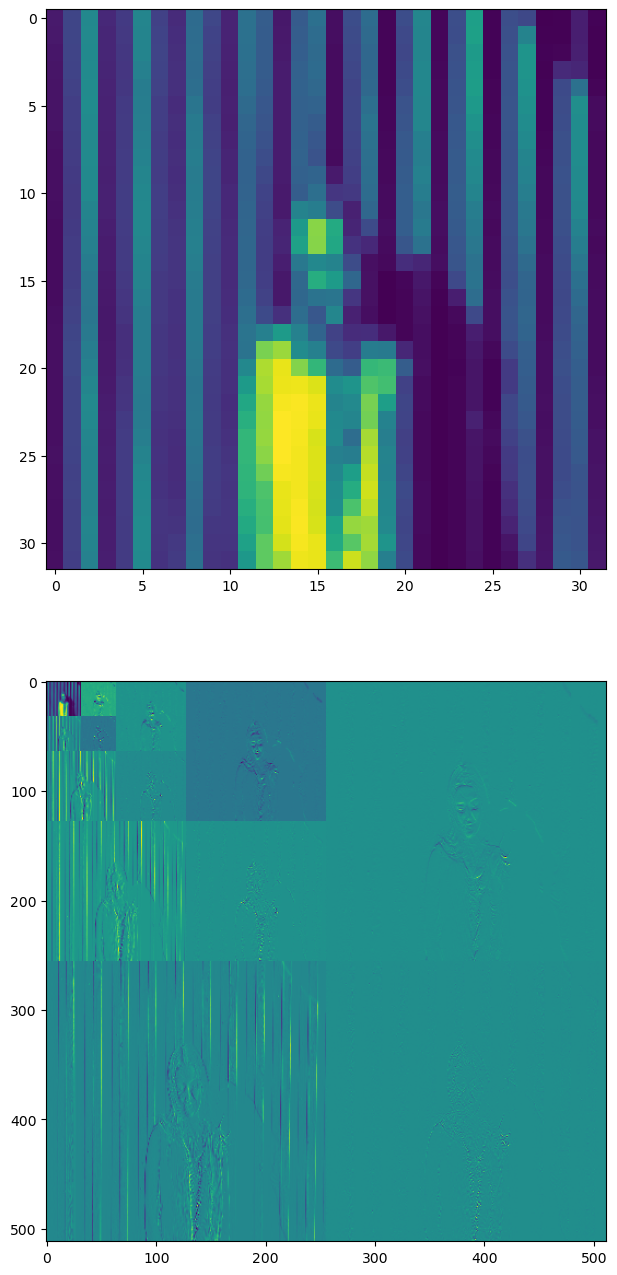

In [584]:
coeffs = processing (im , 'haar')

In [585]:
G = pywt.waverec2(coeffs[:4], 'haar')

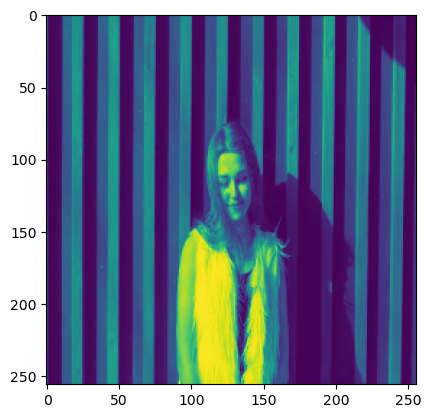

In [586]:
plt.imshow(G)

# Еще я попробовала разделить по каналам изображение и каждый из них обработать ,а потом слепить воедино и получилось плохо (внизу картинка, код не стала вставлять)

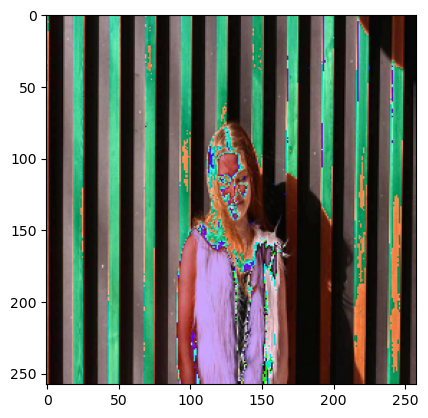

In [226]:
plt.imshow(result)

# Попробую обработать каналы в виде HSV

In [350]:
LEVEL = 4

im = cv2.resize(im,(512,512))

im = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)

coeffs_H = wavelet_transform_for_image(im[:, :, 0], LEVEL, M_WAVELET='haar')
coeffs_S = wavelet_transform_for_image(im[:, :, 1], LEVEL, M_WAVELET='haar')
coeffs_V = wavelet_transform_for_image(im[:, :, 2], LEVEL, M_WAVELET='haar')
       

2 - Нулевой коэффициент
3 - Все коэффициенты


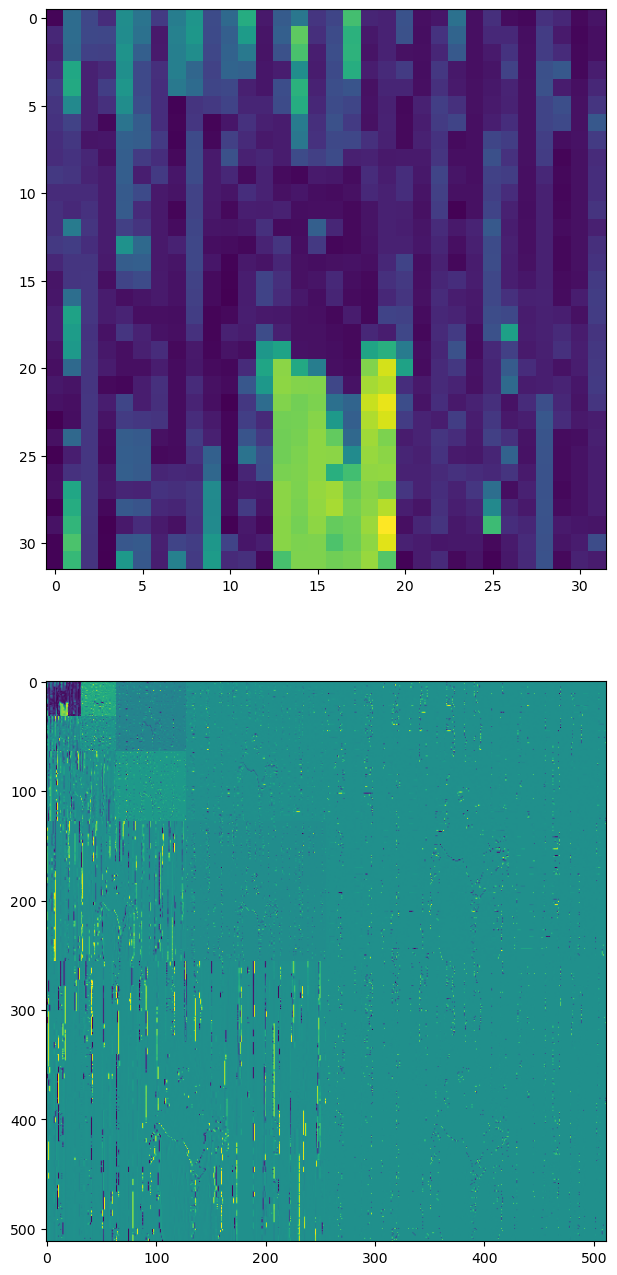

In [351]:
coeffs_visualization(coeffs_H)

2 - Нулевой коэффициент
3 - Все коэффициенты


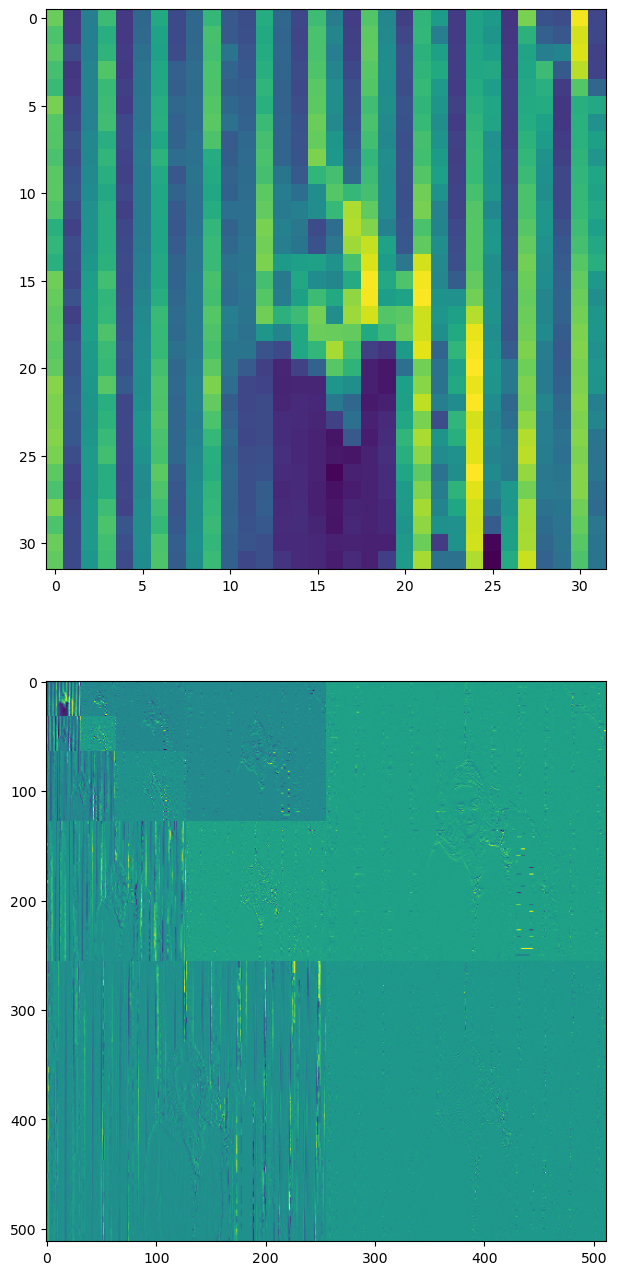

In [352]:
coeffs_visualization(coeffs_S)

2 - Нулевой коэффициент
3 - Все коэффициенты


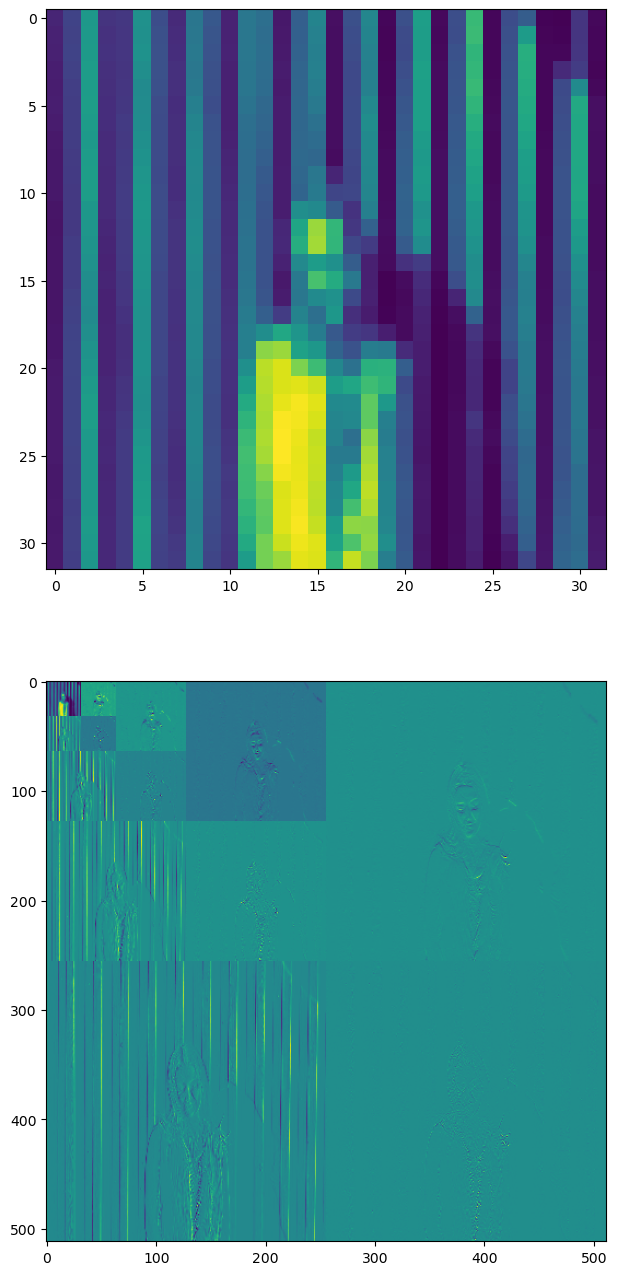

In [353]:
coeffs_visualization(coeffs_V)

In [362]:
A = pywt.waverec2(coeffs_H[:4], 'haar')
B = pywt.waverec2(coeffs_S[:4], 'haar')
C = pywt.waverec2(coeffs_V[:4], 'haar')

In [366]:
A = Image.fromarray(A.astype(np.uint8))
B = Image.fromarray(B.astype(np.uint8))
C = Image.fromarray(C.astype(np.uint8))

In [367]:
res_hsv = PIL.Image.merge('HSV' , (A,B,C))

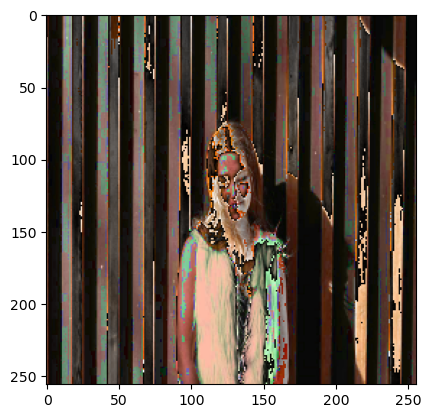

In [368]:
plt.imshow(res_hsv)

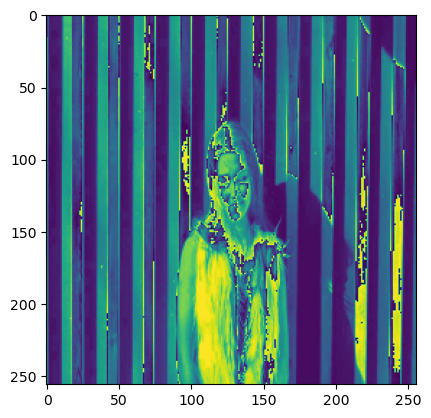

In [372]:
#Только канал H
plt.imshow(C)

# -- > Каналы все-таки нельзя так независимо обрабатывать

# Теперь убедимся, что мы , отбрасывая старшие коэффициенты, в действительности делали низкочастотную фильтрацию ( я взяла обычное сглаживание)

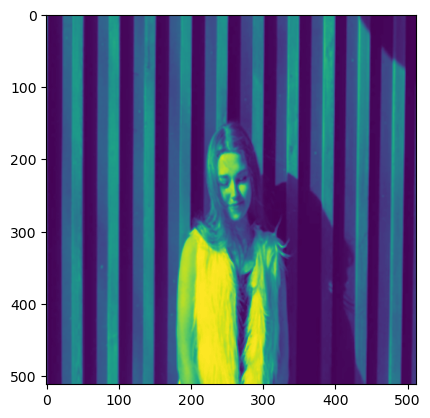

In [286]:
kernel = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
kernel = kernel/sum(kernel)
im_norm = image_normalization(im)
img = cv2.filter2D(im_norm,-1,kernel)
plt.imshow(img)

## Результат похож

# Теперь займемся шумами

In [515]:
def add_gaussian_noise(image, mean, variance, ratio):
    row,col = image.shape
    sigma = variance ** ratio
    gauss = np.random.normal(mean,sigma,(row,col))
    gauss = gauss.reshape(row,col)
    noisy = image + gauss
    noisy *= 255.0 / noisy.max() 
    noisy = np.clip(noisy, 0, 255)
    return noisy

In [395]:
filename = 'masha.jpg'

im = cv2.imread(filename)
im = cv2.resize(im , (512,512))
im = cv2.cvtColor(im , cv2.COLOR_BGR2GRAY)


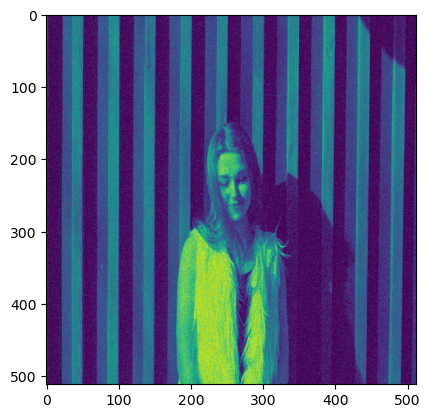

In [396]:
noisy = add_gaussian_noise(im)
plt.imshow(noisy)


a - approximation coefficients (LL)

h - horizontal detail coefficients (LH)

v - vertical detail coefficients (HL)

d - diagonal detail coefficients (HH)

## Я пробегаюсь по всем коэффициентам ( a , h,v,d,aa,ah,av,ad ,...) и делаю трэшхолд

In [451]:
from math import sqrt
import torch
from torch import numel

In [546]:
def noise_reduction_gauss(im , var , thresh):
    noisy = add_gaussian_noise(im,  0, var,1)
    wp = pywt.WaveletPacket2D(data=noisy, wavelet='haar')
    types = ['a', 'h', 'v', 'd']
    for d in range(0, 4):
        for i in range(4):    
            key_word = types[i] * d  
           # print(key_word)
            for j in range(4):
                key_word_inner = key_word + types[j]
                #print(key_word_inner)
                wp[key_word_inner].data = pywt.threshold(wp[key_word_inner].data, thresh, 'soft')
            if(key_word_inner == 'd'):
                break


    a = wp.reconstruct(update=False)
    plt.imshow(a)
    sko=sqrt(sum(sum((im-a)**2))/(512*512))
    return(sko)

In [522]:
threshs = [ 1 , 5 , 10 , 15 , 20 ]
noise_5 = [0,0,0,0,0]
noise_10 = [0,0,0,0,0]
noise_20 = [0,0,0,0,0]

In [537]:
for i in range(5):
    noise_5[i] = noise_reduction_gauss(im , 5 , threshs[i]) 
    noise_10[i] = noise_reduction_gauss(im , 10 , threshs[i])
    noise_20[i] = noise_reduction_gauss(im , 20 , threshs[i])

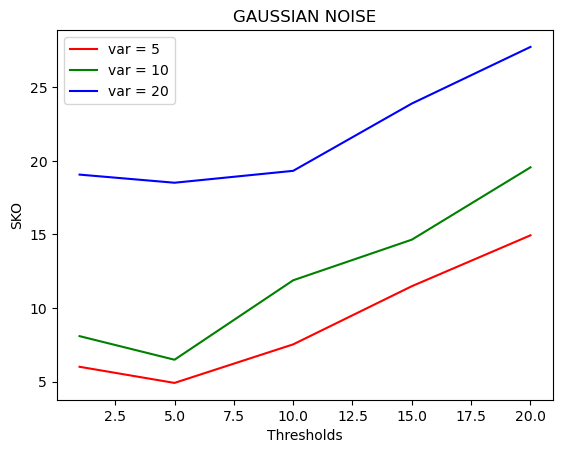

In [544]:
plt.plot(np.asarray(threshs), np.asarray(noise_5), color='r', label='var = 5')
plt.plot(np.asarray(threshs), np.asarray(noise_10), color='g', label='var = 10')
plt.plot(np.asarray(threshs), np.asarray(noise_20), color='b', label='var = 20')  

plt.xlabel("Thresholds")
plt.ylabel("SKO")
plt.title("GAUSSIAN NOISE")

plt.legend()

plt.show()

## Лучший результат

4.9869550470907384

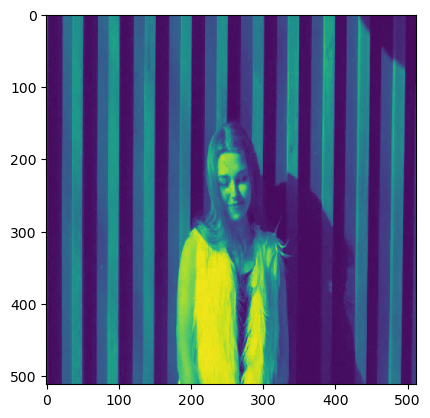

In [547]:
noise_reduction_gauss(im,5,5)

# Salt and Pepper noise

In [550]:
def add_salt_and_paper_noise(image, salt_ratio_paper, amount):
    row, col = image.shape
    out = np.copy(image)
    num_salt = np.ceil(amount * image.size * salt_ratio_paper)
    coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
    out[tuple(coords)] = 1
    num_pepper = np.ceil(amount * image.size * (1. - salt_ratio_paper))
    coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
    out[tuple(coords)] = 0
    out = np.clip(out, 0, 255)
    return out

In [580]:
def noise_reduction_sp(im , var , thresh):
    noisy = add_salt_and_paper_noise(im,  var, 0.005)
    wp = pywt.WaveletPacket2D(data=noisy, wavelet='haar')
    types = ['a', 'h', 'v', 'd']
    for d in range(0, 4):
        for i in range(4):    
            key_word = types[i] * d  
           # print(key_word)
            for j in range(4):
                key_word_inner = key_word + types[j]
                #print(key_word_inner)
                wp[key_word_inner].data = pywt.threshold(wp[key_word_inner].data, thresh, 'soft')
            if(key_word_inner == 'd'):
                break


    a = wp.reconstruct(update=False)
    plt.imshow(a)
    sko=sqrt(sum(sum((im-a)**2))/(512*512))
    return(sko)

In [577]:
threshs = [ 0.2 , 0.5 , 1 , 2,3]
noise_5 = [0,0,0,0,0]
noise_10 = [0,0,0,0,0]
noise_20 = [0,0,0,0,0]

In [578]:
for i in range(5):
    noise_5[i] = noise_reduction_sp(im , 0.1 , threshs[i]) 
    noise_10[i] = noise_reduction_sp(im , 0.5 , threshs[i])
    noise_20[i] = noise_reduction_sp(im , 1 , threshs[i])

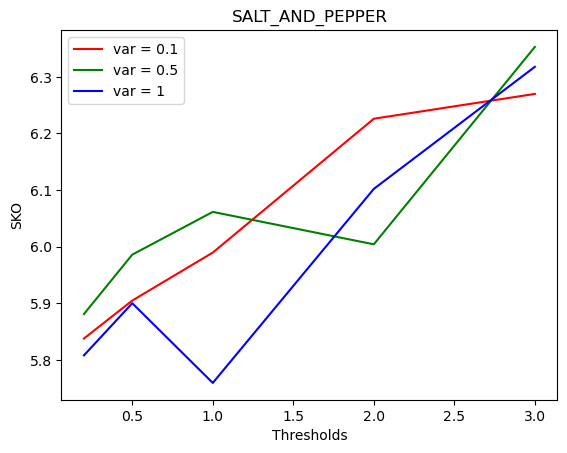

In [579]:
plt.plot(np.asarray(threshs), np.asarray(noise_5), color='r', label='var = 0.1')
plt.plot(np.asarray(threshs), np.asarray(noise_10), color='g', label='var = 0.5')
plt.plot(np.asarray(threshs), np.asarray(noise_20), color='b', label='var = 1')  

plt.xlabel("Thresholds")
plt.ylabel("SKO")
plt.title("SALT_AND_PEPPER")

plt.legend()

plt.show()

## Лучший результат

5.787279984595032

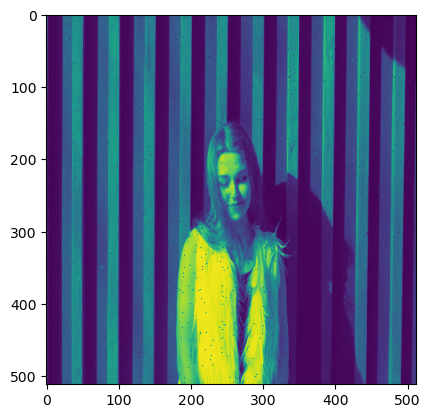

In [581]:
noise_reduction_sp(im,1,1)

# Все :)